<a href="https://colab.research.google.com/github/A-Peoples/NFL_EPA/blob/main/Average_EPA_for_NFL_Teams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing nfl_data_py**

In [158]:
!pip install nfl_data_py

**Importing the Necessary Packages**

In [159]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = nfl.import_pbp_data([2023])

team_names = ('CAR', 'CIN', 'LV', 'IND', 'NYJ', 'DET', 'DAL', 'KC', 'PHI', 'TB',
       'SF', 'LA', 'NE', 'MIN', 'JAX', 'HOU', 'ARI', 'MIA', 'PIT', 'NYG',
       'WAS', 'NO', 'SEA', 'TEN', 'ATL', 'CLE', 'GB', 'LAC', 'BUF', 'CHI',
       'DEN', 'BAL')


df["play_type"].unique()

2023 done.
Downcasting floats.


array([None, 'kickoff', 'run', 'pass', 'punt', 'no_play', 'extra_point',
       'field_goal', 'qb_kneel', 'qb_spike'], dtype=object)

**Average Passing EPA**

In [160]:
pass_epa = pd.DataFrame()
for team_name in team_names:
  df_2 = df.loc[(df["posteam"]==team_name) & (df["play_type"]=="pass")]
  total_epa = df_2.groupby('offense_formation')["epa"].mean().reset_index().sort_values(by='epa', ascending=False)
  total_epa["name"]=team_name
  pass_epa = pd.concat([pass_epa, total_epa]).sort_values(by='epa', ascending=False)
pass_epa

,offense_formation,epa,name
6,WILDCAT,3.524960,TEN
2,JUMBO,3.411498,IND
2,JUMBO,2.418565,CHI
3,PISTOL,1.693073,WAS
2,JUMBO,1.632155,LAC
...,...,...,...
2,JUMBO,-1.281314,LA
2,JUMBO,-1.724108,JAX
2,JUMBO,-1.777500,DEN
1,I_FORM,-2.149081,PHI


**Average Rushing EPA**

In [161]:
rush_epa = pd.DataFrame()
for team_name in team_names:
  df_2 = df.loc[(df["posteam"]==team_name) & (df["play_type"]=="run")]
  total_epa = df_2.groupby('offense_formation')["epa"].mean().reset_index().sort_values(by='epa', ascending=False)
  total_epa["name"]=team_name
  rush_epa = pd.concat([rush_epa, total_epa]).sort_values(by='epa', ascending=False)
rush_epa

,offense_formation,epa,name
0,EMPTY,2.034896,CAR
0,EMPTY,1.511316,SF
5,WILDCAT,1.315433,LV
0,EMPTY,1.269187,DAL
0,EMPTY,1.098043,WAS
...,...,...,...
6,WILDCAT,-1.050879,DAL
5,WILDCAT,-1.573830,MIA
3,PISTOL,-1.926100,DEN
6,WILDCAT,-2.806638,BAL


**Combining both datasets**


In [162]:
pass_epa["stat"] = "pass"
rush_epa["stat"] = "rush"
combined_epa = pd.concat([pass_epa, rush_epa])


**EPA Table**

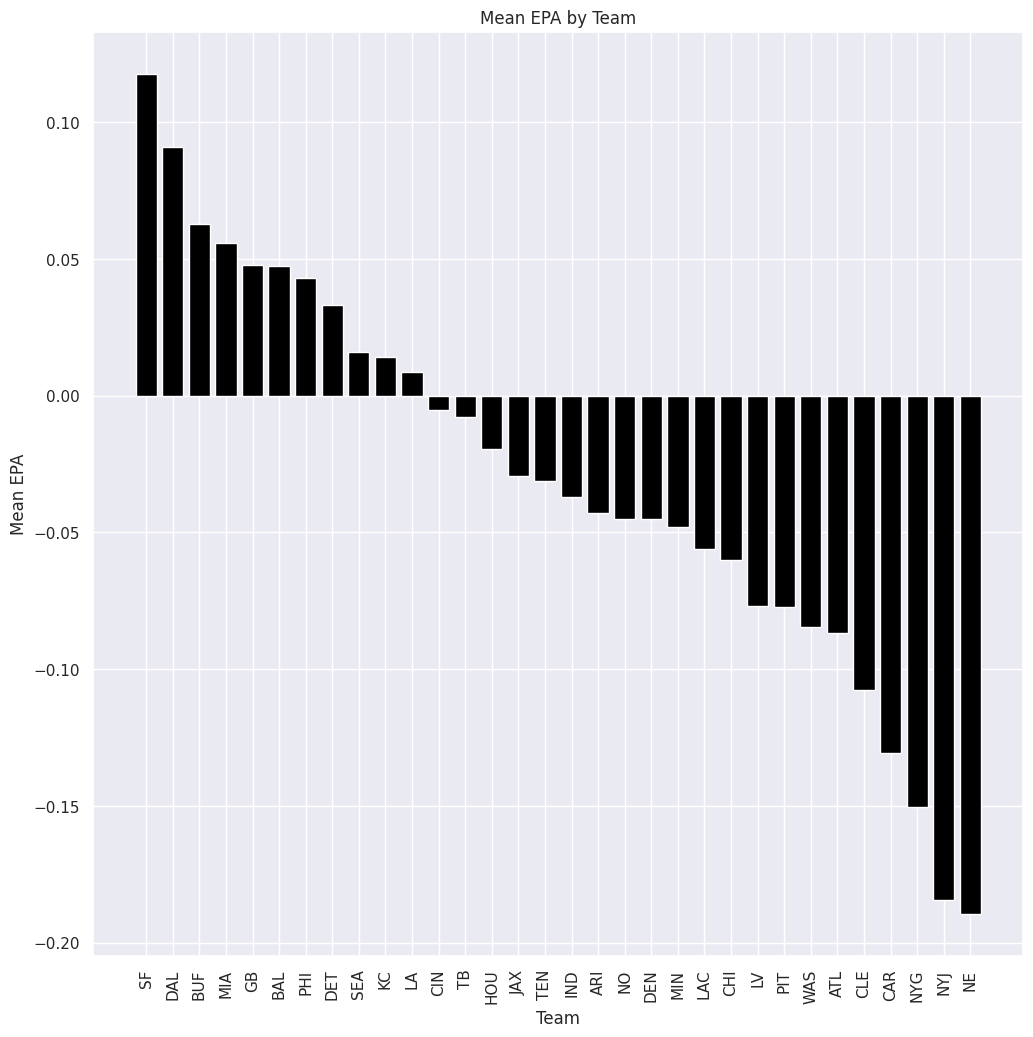

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined and contains your data
EPA = df.groupby('posteam')[['epa']].mean().sort_values(by='epa', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))  # Create a figure and axis

# Set the background color of the figure
#fig.set_facecolor('blue')

# Create the bar chart
bars = ax.bar(EPA.index, EPA['epa'], color='black')

# Set the background color of the axes
#ax.set_facecolor('blue')

# Set the labels and title
ax.set_xlabel('Team')
ax.set_ylabel('Mean EPA')
ax.set_title('Mean EPA by Team')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()
